In [47]:
import tweepy
import json
import requests
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Twitter API Keys
consumer_key = "qQMpIV12vPN241al3UQXDW7bt"
consumer_secret = "5tn5RYtfXlZiex9qgfm5OSGAyZJNbeImz5NmkKAcJgWKMOf69s"
access_token = "557416160-musc8QTpAvQBneCJGZaqHGRUTv2bsYjgaEw1IrwN"
access_token_secret = "Duk5kO61qT3kmAfwxYrKiHNgXyUkPiudGzSETkA5RdbWe"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [34]:
target_user = ("@Nytimes","@BBC","@cbsnews","@cnn","@foxnews")

# Counter
counter = 1

# Variables for holding sentiments
sentiments = []

for target in target_user:

# Loop through 5 pages of tweets (total 100 tweets)
     for x in range(5):

        # Run search around each tweet
        public_tweets = api.user_timeline(target, page=x)

        # Loop through all tweets
        for tweet in public_tweets:
        
        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter
        
        # Add sentiments for each tweet into an array
            sentiments.append({"UserName": target,
                                   "Date": tweet["created_at"],
                                   "Compound": compound,
                                   "Positive": pos,
                                   "Neutral": neu,
                                   "Negative": neg,
                                   "Tweets Ago": counter})
        
        # Add to counter 
            counter = counter + 1

In [35]:
sentiments_df = pd.DataFrame.from_dict(sentiments)
sentiments_df.head(1000)

,Compound,Date,Negative,Neutral,Positive,Tweets Ago,UserName
0,0.0000,Wed Dec 13 21:40:03 +0000 2017,0.000,1.000,0.000,1,@Nytimes
1,-0.5574,Wed Dec 13 21:30:27 +0000 2017,0.184,0.816,0.000,2,@Nytimes
2,-0.2960,Wed Dec 13 21:20:07 +0000 2017,0.239,0.761,0.000,3,@Nytimes
3,0.6369,Wed Dec 13 21:10:11 +0000 2017,0.000,0.792,0.208,4,@Nytimes
4,0.0000,Wed Dec 13 21:04:01 +0000 2017,0.000,1.000,0.000,5,@Nytimes
5,-0.3182,Wed Dec 13 21:00:05 +0000 2017,0.223,0.777,0.000,6,@Nytimes
6,0.3400,Wed Dec 13 20:50:02 +0000 2017,0.000,0.888,0.112,7,@Nytimes
7,-0.0516,Wed Dec 13 20:40:12 +0000 2017,0.220,0.606,0.174,8,@Nytimes
8,-0.8225,Wed Dec 13 20:30:11 +0000 2017,0.342,0.602,0.056,9,@Nytimes
9,0.5994,Wed Dec 13 20:20:18 +0000 2017,0.000,0.726,0.274,10,@Nytimes


In [36]:
sns.lmplot(x= 'Tweets Ago', y= 'Compound', data=sentiments_df, fit_reg=False, hue='UserName')

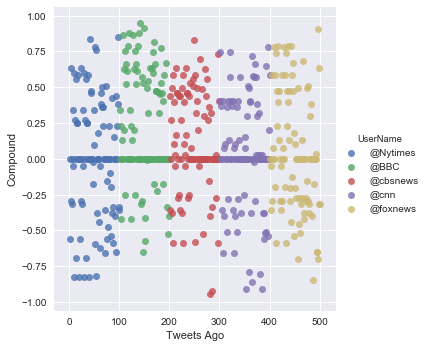

In [37]:
plt.show()

In [56]:
meanscore_df = sentiments_df.groupby("UserName")["Compound"].mean()

In [57]:
meanscore_df

UserName
@BBC        0.217576
@Nytimes    0.000625
@cbsnews    0.100930
@cnn        0.029370
@foxnews    0.034397
Name: Compound, dtype: float64

In [62]:
mean2_df = pd.DataFrame(meanscore_df.reset_index())

In [63]:
mean2_df.head()

,UserName,Compound
0,@BBC,0.217576
1,@Nytimes,0.000625
2,@cbsnews,0.100930
3,@cnn,0.029370
4,@foxnews,0.034397


In [72]:
sns.barplot(x='UserName',y='Compound', data=mean2_df)

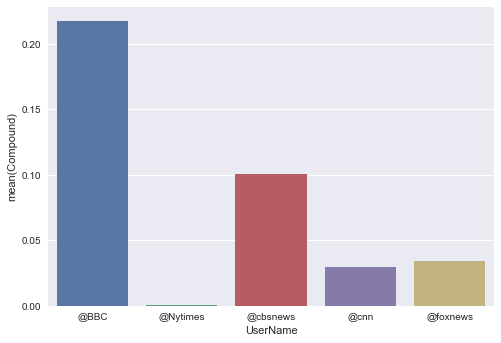

In [73]:
plt.show()